In [1]:
# CHANGE THIS IF YOU NEED/WANT TOO

# pandas / numpy
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# datetime operations
from datetime import datetime

# ttest and euclidean distance
from scipy.stats import ttest_ind
from scipy.spatial.distance import seuclidean

# linear fit using statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# good ole sklearn
from sklearn.metrics import euclidean_distances, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate

# displaying markdown strings
from IPython.display import display, Markdown, Latex

## Part 1: Will this album be a hit?

The first project you embark on in your new job is to build a regressor to predict whether an album will be well received or not. According to *Signor Piccardi* (your boss), this algorithm may eventually be helpful in forecasting the success of albums produced by *Piccardi Music*.

**Task 1 (Initial analyses — 10 pts)**

As a good data scientist, the first thing you do is to have a good look at the data that was handed to you.

1. Load the data using `pandas`. Identify and remove duplicate reviews, i.e., two reviews with albums by the same band with the same name (keep the first occurrence). Print the number of rows in your dataframe.

2. Plot the distribution of album release years and the average score of albums per year.

3. For numerical columns, calculate the mean, median, minimum value and maximum value. Additionally, plot the distribution for all the numerical columns in a single image (possibly with multiple subplots). Your image should be at most 14 inches wide by 14 inches long.

3. For categorical columns, list how many different values there are in each column. If there are less than 10 distinct values for a category, print them all. For the `genre` column, assign the value `'Other'` for albums where the value is either `'none'` or `NaN`.

5. **Discuss:** This dataset was built with *found data*—i.e., the Pitchfork reviews were not made with the goal of training a machine learning model. Grounded on the previous analyses and in Pitchfork's [Wikipedia page](https://en.wikipedia.org/wiki/Pitchfork_(website)), point **three** (exactly!) ways in which this data may not be representative of music albums in general due to the way the data was collected. 

---

**Answer 1.1**

First the compressed data file is loaded using Pandas

In [2]:
data_folder = './data/'
df = pd.read_csv(data_folder + 'pitchfork.csv.gz',compression='gzip')

df.head()

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009.0,February 18 2009,Studio,Electronic,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003.0,July 17 2003,Badman,Rock,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308


We count the number of rows before removing duplicates:

In [3]:
# checking that there are no NaN values
print('Number of Na values in the dataframe : ', df.isna().sum().sum())
print('Is the indexing row composed of unique values? ', df.index.is_unique)
# Since there are no Nan values, we keep all rows, and since every row has a unique index,
# The number of rows is equal to the number of indexes
row_num = len(df.index)
print('Number of rows in the data frame before removing duplicates: ', row_num)

Number of Na values in the dataframe :  0
Is the indexing row composed of unique values?  True
Number of rows in the data frame before removing duplicates:  16785


We then drop duplicate rows :

In [4]:
exact_duplicates = df.duplicated().sum()
print('Number of exact duplicates : %d' % exact_duplicates)
df.drop_duplicates(keep='first', inplace=True)
row_num = len(df.index)
saved_df = df

Number of exact duplicates : 1


We then check for and drop rows where the artist name is the same as the album name:

In [5]:
same_artist_album = df.duplicated(subset=['artist','album']).sum()
print('Rows with the same album and artist name : %d' % same_artist_album)
df.drop_duplicates(subset=['artist','album'], keep='first', inplace=True)

Rows with the same album and artist name : 46


In [6]:
print('Number of deleted rows : ', row_num
      - len(df.index))
print('Number of rows in the data frame after removing duplicates: ', len(df.index))

Number of deleted rows :  46
Number of rows in the data frame after removing duplicates:  16738


After removing the duplicate rows we are left with 16738 rows, 46 less rows than the original dataframe.

**Answer 1.2**

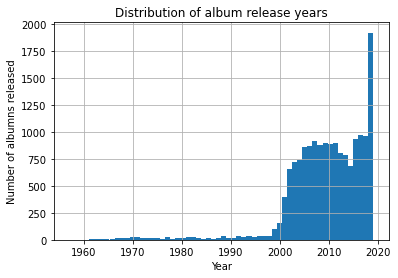

In [7]:
df['releaseyear'].hist(bins=60)

plt.ylabel('Number of albumns released')
plt.xlabel('Year')
plt.title('Distribution of album release years');

To calculate the average score of albums per year, we first group the score per year:

In [8]:
scores_grouped_year = df.groupby(df.releaseyear)

Then we calculate the mean value of each group (.mean() aggregates the scores by year for us)

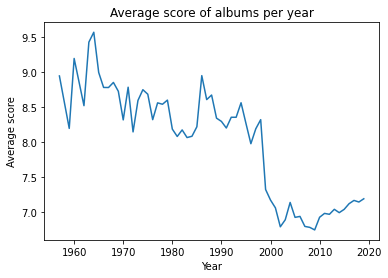

In [9]:
mean_scores_year = scores_grouped_year['score'].mean()
mean_scores_year.plot()
plt.xlabel('Year')
plt.ylabel('Average score')
plt.title('Average score of albums per year');
plt.show()

**Answer 1.3**

_For numerical columns, calculate the mean, median, minimum value and maximum value._

The numerical columns are : 
- score
- releaseyear
- danceability	
- energy	
- key	
- loudness	
- speechiness	
- acousticness	
- instrumentalness	
- liveness	
- valence	
- tempo	
- energy	


After taking only the numerical columns from the dataframe, we use the describe function to return the mean, median minimum and maximum values of each column.

In [10]:
numerical_columns = ['score', 'releaseyear', 'danceability', 'energy', 'key',
                     'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                     'liveness', 'valence', 'tempo', 'energy', 'key']

df[numerical_columns].describe().loc[['mean','50%','min','max']]

,score,releaseyear,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,energy,key
mean,7.048596,2009.346338,0.512334,0.601276,5.216501,-9.283268,0.090742,0.301914,0.274748,0.196402,0.405268,120.326487,0.601276,5.216501
50%,7.300000,2010.000000,0.511348,0.624722,5.230769,-8.444263,0.056665,0.228844,0.149363,0.174261,0.406288,120.397346,0.624722,5.230769
min,0.000000,1957.000000,-1.000000,-1.000000,-1.000000,-51.728750,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,10.000000,2019.000000,0.974000,0.999000,11.000000,4.078000,0.958000,0.996000,0.982000,0.978000,0.971000,215.972000,0.999000,11.000000


_Additionally, plot the distribution for all the numerical columns in a single image (possibly with multiple subplots). Your image should be at most 14 inches wide by 14 inches long._

In [11]:
import math
# we import math because we will use the floor function to calculate the index that will be plugged into a plot axes 
# to plot the numerical column distributions

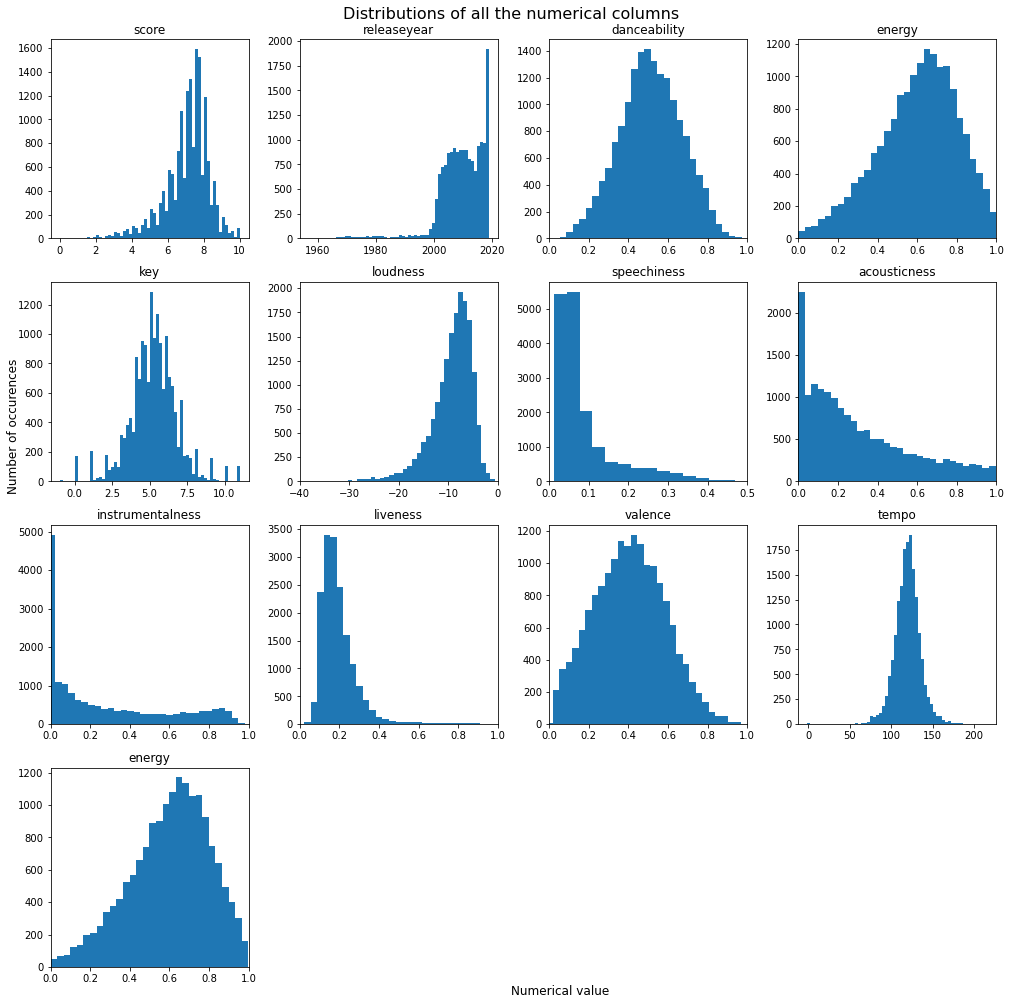

In [12]:
fig, ax = plt.subplots(4,4, figsize= (14,14)) # matplotlib's default unit is inches

for i in range(13):
    sbplt = ax[math.floor(i/4) , i%4]
    sbplt.hist(df[numerical_columns[i]],bins = 60)
    sbplt.set_title(numerical_columns[i])
    if (numerical_columns[i] == 'danceability'):
        sbplt.set_xlim(0, 1)
    if (numerical_columns[i] == 'speechiness'):
        sbplt.set_xlim(0, 0.5)
    if (numerical_columns[i] == 'acousticness'):
        sbplt.set_xlim(0, 1)
    if (numerical_columns[i] == 'loudness'):
        sbplt.set_xlim(-40, 0)
    if (numerical_columns[i] == 'instrumentalness'):
        sbplt.set_xlim(0, 1) 
    if (numerical_columns[i] == 'liveness'):
        sbplt.set_xlim(0, 1)    
    if (numerical_columns[i] == 'valence'):
        sbplt.set_xlim(0, 1)   
    #if (numerical_columns[i] == 'tempo'):
        #sbplt.set_xlim(0, 1)   
    if (numerical_columns[i] == 'energy'):
        sbplt.set_xlim(0, 1)   

fig.text(0.5,0, "Numerical value", fontsize=12)
fig.text(0,0.5, "Number of occurences", rotation = 90, fontsize=12)

fig.suptitle('Distributions of all the numerical columns', fontsize=16)

# here we remove the last 4 empty subplot since we only have 21 plots
for i in range(13,16):
    fig.delaxes(ax[math.floor(i/4) , i%4])

# so that the titles aren't superimposed
plt.tight_layout()

**Answer 1.4**

_For categorical columns, list how many different values there are in each column. If there are less than 10 distinct values for a category, print them all. For the genre column, assign the value 'Other' for albums where the value is either 'none' or NaN._

The expression
```python 
(df['genre'].str.contains('none') | df['genre'].isna())
```
checks for cells which contain the string 'none' or a NaN value, then the cell is replaced with 'Other', `.loc` is used to avoid chain indexing

In [13]:
df.loc[(df['genre'].str.contains('none') | df['genre'].isna()), 'genre'] = 'Other'

The categorical columns are : 
- artist
- album
- reviewauthor
- recordlabel
- genre

Here we display the number of unique values in our categorical columns

In [14]:
df[['artist', 'album', 'reviewauthor', 'recordlabel', 'genre']].nunique()

artist           7892
album           16183
reviewauthor      554
recordlabel      3032
genre              10
dtype: int64

Since the genre columns only contains 10 unique values we display them all

In [15]:
df['genre'].unique()

array(['Electronic', 'Folk/Country', 'Rock', 'Rap', 'Global',
       'Experimental', 'Metal', 'Pop/R&B', 'Jazz', 'Other'], dtype=object)

**Answer 1.5 : Discuss** _This dataset was built with found data—i.e., the Pitchfork reviews were not made with the goal of training a machine learning model. Grounded on the previous analyses and in Pitchfork's Wikipedia page, point three (exactly!) ways in which this data may not be representative of music albums in general due to the way the data was collected._

There are multiple ways in which this data may not be representative of music albums in general : 
- According to the Pitchfork's wikipedia page when they started out most of their music was of the genre Indie Rock. Since a machine learning model's generalizing ability will depend a lot waht's in the dataset it would be better if the Dataset is more varied, as in contained a lot of different genres ( or in other words that the data-set it balanced).

- Also the reviews depend probably on the time at which the reviews were done, and in the dataset it would seem like most of the reviews have been done a long time after the production of the albums . Looking at the distributions we plotted above, it seems like, for example there are more albums that are "lively"). This could skew the results in a certain way if for example ablums from a period have been review during another period where people generally had the same opinion on the album.

- The dataset has been made in the US and contains mostly albums from there. Therefore it is unadapted to predict albums score from other areas of the world.

#### **Task 2 (Pre-processing and pipeline code — 12 pts)**

Next, you decide to prepare the code that will help you in training your machine learning models. Also, you implement a simple baseline. For this task, **unless otherwise stated** you must implement functions yourself, instead of relying on `scikit-learn` (you can use `numpy` or `pandas`, though!).

1. For each possible value in the `genre` column, create a new column called `{genre}_onehot` (e.g., for `genre=jazz`, create `jazz_onehot`). Collectively, these new columns should "one hot-encode" the genre column—for instance, if for a given album the `genre` is filled with the value `jazz`, the `jazz_onehot` column should equal 1 and all other `{genre}_onehot` columns should equal 0. 

2. Create a function `numpy_helper(df, cols)` to obtain a `numpy.array` out of your `dataframe`. The function should receive a dataframe `df` with N rows and a list of M columns `cols`, and should return a `np.array` of dimension (NxM).

3. For each album, build an array of features `X` containing all genre-related one-hot features, and an array of outcomes `y` containing scores. Using the function [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with `random_state=123`, split the data into a train set containing 70% of all data, and a test set containing the remaining 30%.

4. Create your own baseline regressor. Using the training data (in the training stage), your regressor should estimate the average score for all albums. Then, for the test data (in the prediction stage), your classifier should always output the average score (computed on the training data).

5. Calculate the [coefficient of determination ($R^2$)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) of your baseline on the test data. **You are allowed to use the `sklearn` implementation here.**

6. **Discuss:** Your train-test split randomly selected 70% of all data for the training set. Why is this a problem for the broader task of predicting whether a future album will be successful or not?

---

**Answer 2.1**

The function get_dummies is use to create the one hot labels for the genre categories, and then add_suffix is used to rename the columnse to `{genre}_onehot`. The columns are then added into the dataframe, and the old 'genre' row is dropped, since all the information it contains is in the one_hot encodings.

In [16]:
onehot_columns = pd.get_dummies(df['genre']).add_suffix('_onehot').copy()

In [17]:
df[onehot_columns.columns] = onehot_columns
df.drop(columns=['genre'],inplace=True)
df.head()

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,danceability,energy,key,...,Electronic_onehot,Experimental_onehot,Folk/Country_onehot,Global_onehot,Jazz_onehot,Metal_onehot,Other_onehot,Pop/R&B_onehot,Rap_onehot,Rock_onehot
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009.0,February 18 2009,Studio,0.511917,0.499667,5.250000,...,1,0,0,0,0,0,0,0,0,0
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,0.369765,0.325412,4.470588,...,0,0,1,0,0,0,0,0,0,0
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,0.253943,0.912857,4.428571,...,1,0,0,0,0,0,0,0,0,0
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003.0,July 17 2003,Badman,0.425400,0.433474,5.700000,...,0,0,0,0,0,0,0,0,0,1
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,0.624846,0.438154,4.153846,...,0,0,0,0,0,0,0,0,1,0


In [18]:
# sanity check : checking if there is indeed only one genre per row
print(len(onehot_columns.index))
print(onehot_columns.sum(axis=1).sum())

16738
16738


**Answer 2.2**

In [19]:
def numpy_helper(df, cols):
    '''
    Receives a dataframe df with N rows and a list of M columns cols,
    and returns a np.array of dimension (NxM)
    Input:
    - df (pd.DataFrame) :
    - cols : (list) list of M columns
    Output:
    - np_array (np.array) : numpy array 
    '''
    np_array = df[cols].to_numpy(copy=True)
    return np_array

In [20]:
test = numpy_helper(df, ['artist','album','reviewauthor'])
print(type(test))
print(test)

<class 'numpy.ndarray'>
[['Studio 1' 'Studio 1' 'Andy Battaglia']
 ['John Fahey' 'The Great Santa Barbara Oil Slick' 'Mark Richardson']
 ['Reigning Sound' 'Too Much Guitar' 'Stephen M. Deusner']
 ...
 ['Mavis Staples' 'We Get By' 'Stephen M. Deusner']
 ['Amyl and the Sniffers' 'Amyl and the Sniffers'
  'Stephen Thomas Erlewine']
 ['D√¢m-Funk' 'STFU II EP' 'Jonah Bromwich']]


**Answer 2.3**

_For each album, build an array of features X containing all genre-related one-hot features, and an array of outcomes y containing scores. Using the function sklearn.model_selection.train_test_split with random_state=123, split the data into a train set containing 70% of all data, and a test set containing the remaining 30%_

```python
df[np.append('album',onehot_columns.columns.values)] 
```
takes only the columns that interest us for this part

In [21]:
X = numpy_helper(df, cols = onehot_columns.columns.values)
X

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0]], dtype=uint8)

In [22]:
Y = numpy_helper(df, cols = 'score')
Y

array([8.5, 8.2, 8.3, ..., 7.5, 7.2, 7.1])

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=123, shuffle=True, stratify=None)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11716, 10)
(5022, 10)
(11716,)
(5022,)


**Answer 2.4**

_Create your own baseline regressor. Using the training data (in the training stage), your regressor should estimate the average score for all albums. Then, for the test data (in the prediction stage), your classifier should always output the average score (computed on the training data)._

In [26]:
def baseline_regressor(y_train,y_test):
    '''
    Estimates the average score for all albums using training data, 
    and for the test phase always outpus average score
    input:
    y_train (np.array) : array containing the scores for the training sampes
    output:
    y_predicted (np.array) : array containing the prediction
    '''
    y_predicted = np.mean(y_train)*np.ones(len(y_test))
    return y_predicted

In [27]:
y_predicted = baseline_regressor(y_train,y_test)
y_predicted

array([7.04511779, 7.04511779, 7.04511779, ..., 7.04511779, 7.04511779,
       7.04511779])

**Answer 2.5**

_Calculate the coefficient of determination ( 𝑅2 ) of your baseline on the test data. You are allowed to use the sklearn implementation here._

In [28]:
from sklearn.metrics import r2_score

In [29]:
r2_score(y_test, y_predicted, multioutput='uniform_average')

-8.75891503990811e-05

**Answer 2.6 : Discuss**

_Discuss: Your train-test split randomly selected 70% of all data for the training set. Why is this a problem for the broader task of predicting whether a future album will be successful or not?_

Since the train-test was split **randomly**, the train and test contain albums with random dates. What we should have is a training set containing "older" albums, and a test set containg only albums that were created after the training set albums. That way when we evaluate the model we will evaluate it's ability to predict if a _**future**_ album will be successful, and not just if an old album was successful or not.

**Task 3 (Regression — 14 pts)**

Finally, you get down to business and train your regression models.

1. Build a Linear Regression model (use `sklearn`) that predicts the outcome `score` using the features "releaseyear",  "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo" and the one-hot encoded genre-related columns.  Using a 70/30 train-test split similar to what you did in task two (hereinafter referred to as "the random split", use the same random seed, `random_state=123`), report the $R^2$ for the testing set.

2. Create an alternate train-test split (hereinafter referred to as "the longitudinal split") where you train with data from albums released before 2000 and test with data from 2003 and after. Report the $R^2$ for the testing set using the same model you developed for the previous question. **Discuss:** give the correct interpretation of $R^2$ value for the longitudinal split.

3. For a given entry $X$ your model outputs a predicted score $Y'$. The difference between the real score $Y$ and the predicted score $Y'$ is called the "residual". Considering the model trained in 3.2, plot the distribution of your residuals for the test set. Additionally, estimate what is the probability that your score prediction (from 3.2) is off by more than 2-points? Provide bootstrapped confidence intervals for your answer.

4. Experiment with training a different regressor, a Gradient Boosting Regressor. This regressor is related to the Boosted decision trees that you have seen in class. This model performs extremely well for a variety of tasks and is often used in machine learning competitions for tabular data (e.g., on Kaggle). Train the regressor using the longitudinal split and the same features as in 3.2, use the default hyperparameters. Report the $R^2$ for the testing set. 

5. **Discuss:** Hypothesize a reason for the difference in performance between the Linear regression and the Gradient Boosting Regressor.

---

**Answer 3.1**

In [30]:
# Generating in numpy the dataset and the labels
features = ["releaseyear", "key", "acousticness", "danceability", "energy", "instrumentalness", \
            "liveness", "loudness", "speechiness", "valence", "tempo"] + list(onehot_columns.columns.values)
X = numpy_helper(df, cols = features)
Y = numpy_helper(df, cols = 'score')

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=123, shuffle=True, stratify=None)

# Compute the predictions using Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)  # train it
y_predicted = lin_reg.predict(X_test)

# Compute R^2
r2_score(y_test, y_predicted)

0.04419659171609447

Using those features the Linear Model could only explain about 4% of the variance of the score of an album...

**Answer 3.2**

In [31]:
def longitudinal_split(df):
    before_2000 = df[df["releaseyear"] < 2000]
    after_2003 = df[df["releaseyear"] >= 2003]

    X_train = numpy_helper(before_2000, cols = features)
    y_train = numpy_helper(before_2000, cols = 'score')
    X_test = numpy_helper(after_2003, cols = features)
    y_test = numpy_helper(after_2003, cols = 'score')
    
    return X_train , y_train, X_test, y_test

# Computing the predictions for the Linear Regression using a longitudinal split of the data
# Returns the predicted scores along with the corresponding true scores

def longitudinal_predict (df):
    # Longitudinal Split of the data
    X_train , y_train, X_test, y_test = longitudinal_split(df)
    # Compute the predictions using Linear Regression
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)  # train it
    y_predicted = lin_reg.predict(X_test) # Compute the predictions

    return y_test, y_predicted

# Compute R^2 (using a longitudinal split of the data)
y_test, y_predicted = longitudinal_predict(df)
print(r2_score(y_test, y_predicted))

-0.2832151171710233


**Answer 3.3**

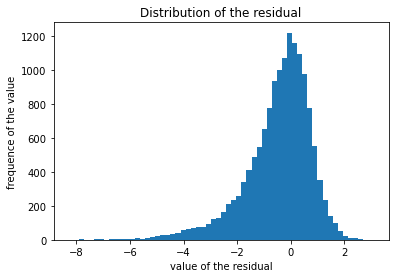

In [32]:
# Plotting the residual
e = y_test - y_predicted #The residual
plt.hist(e, bins=60)
plt.title("Distribution of the residual")
plt.xlabel("value of the residual")
plt.ylabel("frequence of the value")
plt.show()

In [33]:
# Estimating the probability for the score to be off by more than 2 points using bootstrapping strategy

nbr_draws = 1000 # number of random samples
proba_off_2_points = np.zeros(nbr_draws) # residuals estimated for each sample

for n in range(nbr_draws):
    # Sampling
    indices = np.random.randint(0, len(df), len(df))
    df_tmp = df.iloc[indices]
    # for each sample, we estimate the residual using a longitudinal split (cf 3.2)
    score_test, score_predicted = longitudinal_predict(df_tmp)
    abs_residuals = np.abs(score_test - score_predicted)
    proba_off_2_points[n] = sum(abs_residuals >= 2) / len(abs_residuals)

In [34]:
proba_off_2_points_mean = proba_off_2_points.mean()
proba_off_2_points_std = proba_off_2_points.std()

print("The boostrapped mean value of the probability of having an error of more than 2 points is {:.2f} ± {:.2f}".format(proba_off_2_points_mean, proba_off_2_points_std))

The boostrapped mean value of the probability of having an error of more than 2 points is 0.11 ± 0.01


**Answer 3.4**

In [35]:
# Compute the predictions using Gradient Boosting Regression
gb_reg = GradientBoostingRegressor()

X_train , y_train, X_test, y_test = longitudinal_split(df)

gb_reg.fit(X_train, y_train)  # train it
y_predicted = gb_reg.predict(X_test)

# Compute R^2
r2_score(y_test, y_predicted)

-0.4344604613517289

**Answer 3.5 : Discuss**  _Hypothesize a reason for the difference in performance between the Linear regression and the Gradient Boosting Regressor._

Gradient boosting is a sequential method, it uses previous models to build the next one and minimizes the error, so it should perform better than a linear model.

And as expected the Gradient Boosting method works better, however in both cases the R^2 explains only a very small variation of the data ( ~8% for gradient boosting and \ 4% for linear regression). Therefore either our selected variables aren’t meaningful or the dataset isn’t large enough and not representative. 

**Task 4 (Are we solving the correct problem? — 16 pts)**

All your efforts so far have assumed that decisions are taken at the "album" level, which is often not the case for bands with multiple albums. In those cases, it could be interesting to predict what is the success of a given band album given the features of the album **and of previous albums**.

1. Create a new dataframe that contains one row per band with more than 1 album. This dataframe should have the same columns as the data provided to you, considering the latest album of the respective band (note that this is determined by the release year of the album, not the date when it was reviewed). Additionally, for each feature considered in Task 3.1 (including the one-hot encoded features), create an additional column post-fixed with `_previous` (e.g., `danceability_previous`). These columns should contain the average values for all of the band's previous albums. Also, create a column `score_previous` with the average score of previous albums. Print the number of rows in the dataframe as well as the name of the columns.

2. Train a Gradient Boosting Regressor considering all features created in Task 4.1 (note that `score` is the outcome and everything else is a feature, including `score_previous`). Use the 70/30 random train-test split, the default hyperparameters, and report the $R^2$ for the testing set. 

3. Can hyperparameter tuning improve your model? Write modular code (i.e., a function) to divide your training data into $N$ folds and perform cross-validation. Experiment tuning two hyperparameters of the Gradient Boosting Regressor: `n_estimators` and `learning_rate`. For each possible combination of the two hyperparameters (see below for the range of values that you should try for each hyperparameter), train your model in a cross-validation setup with $N=20$ folds. Report the mean  $R^2$ along with the 90% CI for each scenario. 
    - n_estimators $ \in  \{ 100, 200, 300, 400\}$
    - learning_rate $ \in  \{ 0.1, 0.05, 0.01\}$.
 
 With the best hyperparameters obtained, train your model with the entire training set and report the $R^2$ on the testing set.
 
4. **Discuss:** How do these results compare with the previous setup (the scenario considered in **Task 3.4**)? Point out two reasons why it is hard to compare the results obtained in 4.3 and 3.4 at face value? How would you fairly compare the two different setups?

---

**Answer 4.1**

In [36]:
# dataframe that contains one row per band with more than 1 album
more_1_albums = df.groupby("artist").filter(lambda x: len(x["album"]) > 1)
# dataframe with the latest album of each group with more than 1 album
idx_latest_albums = more_1_albums.groupby("artist")["releaseyear"].idxmax()
latest_albums = more_1_albums.loc[idx_latest_albums.values]
# Average values for all of the band's previous albums
averaged_features = features + ["score"]
previous_albums = more_1_albums.drop(idx_latest_albums.values)
mean_previous_albums = previous_albums.groupby("artist")[averaged_features].mean()
# Joining the averaged values for the previous albums to the dataframe with latest albums
latest_and_previous = pd.merge(latest_albums, mean_previous_albums, left_on="artist", right_index=True, suffixes=("", "_previous"))
latest_and_previous.set_index("artist", inplace=True, verify_integrity=True)
# Printing the number of rows and the name of columns
print("Number of rows in the new dataset: {}\n".format(len(latest_and_previous)))
print("Name of the columns of the new dataset: ", latest_and_previous.columns, "\n")
# Printing the final dataset with the latest albums and the averaged information of the previous albums
latest_and_previous.sample(10)

Number of rows in the new dataset: 3564

Name of the columns of the new dataset:  Index(['album', 'reviewauthor', 'score', 'releaseyear', 'reviewdate',
       'recordlabel', 'danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'Electronic_onehot', 'Experimental_onehot',
       'Folk/Country_onehot', 'Global_onehot', 'Jazz_onehot', 'Metal_onehot',
       'Other_onehot', 'Pop/R&B_onehot', 'Rap_onehot', 'Rock_onehot',
       'releaseyear_previous', 'key_previous', 'acousticness_previous',
       'danceability_previous', 'energy_previous', 'instrumentalness_previous',
       'liveness_previous', 'loudness_previous', 'speechiness_previous',
       'valence_previous', 'tempo_previous', 'Electronic_onehot_previous',
       'Experimental_onehot_previous', 'Folk/Country_onehot_previous',
       'Global_onehot_previous', 'Jazz_onehot_previous',
       'Metal_onehot_previous', 'Other_onehot_previous',
       

,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,danceability,energy,key,loudness,...,Experimental_onehot_previous,Folk/Country_onehot_previous,Global_onehot_previous,Jazz_onehot_previous,Metal_onehot_previous,Other_onehot_previous,Pop/R&B_onehot_previous,Rap_onehot_previous,Rock_onehot_previous,score_previous
artist,,,,,,,,,,,,,,,,,,,,,
Think About Life,Family,Rebecca Raber,6.1,2009.0,November 25 2009,Alien8,0.631091,0.752455,4.727273,-4.473455,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.800000
The Double,Loose in the Air,Matthew Murphy,7.4,2005.0,September 13 2005,Matador,0.378600,0.478830,6.000000,-9.367800,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.700000
The Clash,Live at Shea Stadium,Stuart Berman,7.7,2008.0,October 17 2008,Sony,0.382500,0.833150,5.750000,-4.949750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.000000
The Shaky Hands,Let It Die,Stuart Berman,6.4,2009.0,October 27 2009,Kill Rock Stars,0.730545,0.294200,6.818182,-12.738545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.350000
The Organ,Grab That Gun,Sam Ubl,6.6,2004.0,January 12 2005,Mint,0.480000,0.761300,4.100000,-4.061900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.100000
The Thermals,We Disappear,Evan Rytlewski,6.9,2016.0,March 24 2016,Saddle Creek,0.083800,0.042400,0.000000,-28.075000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.216667
Luomo,Convivial,Tim Finney,8.5,2008.0,November 5 2008,Huume,0.876000,0.277000,5.000000,-13.868000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.633333
Twerps,Range Anxiety,Ian Cohen,7.5,2015.0,January 28 2015,Merge,0.433385,0.628769,2.384615,-7.390692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.900000
Alabama Shakes,Sound & Color,Ryan Dombal,8.1,2015.0,April 23 2015,ATO,0.470667,0.610833,7.500000,-6.191500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.800000


**Answer 4.2**

In [37]:
# Generating in numpy the dataset and the labels
features_Q4 = features + [x + "_previous" for x in averaged_features]

X = numpy_helper(latest_and_previous, cols = features_Q4)
Y = numpy_helper(latest_and_previous, cols = 'score')

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=123, shuffle=True, stratify=None)

# Compute the predictions with the new set of features using Gradient Boosting Regression
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)  # train it
y_predicted = gb_reg.predict(X_test)

# Compute R^2
r2_score(y_test, y_predicted)

0.18993939913043256

**Answer 4.3**

In [38]:
# Displaying the mean of R^2 along with the 90% CI for each couple of hyperparameters for Gradient Boosting Regression
def hyper_tuning_GBR (n_estimators, learning_rate, N):
    r2_cv = [] 
    for n in n_estimators:
        for lr in learning_rate:
            gb_reg = GradientBoostingRegressor(n_estimators=n, learning_rate=lr)
            cv_results = cross_validate(gb_reg, X, Y, cv=N, scoring="r2")
            for r2 in cv_results["test_score"]:
                r2_cv.append({"hyperpar": (n, lr), "r2": r2})
    r2_df = pd.DataFrame(r2_cv)
    # Display r2 means along with 90% CI for each couple of hyperparameters
    return r2_df

# hyperparameters used for the Gradient Boosting Regression model
n_estimators = [100,200,300,400]
learning_rate = [0.1,0.05,0.01]
# 20-fold cross-validation is used for the tuning of hyperparameters
N = 20

%time r2_df = hyper_tuning_GBR(n_estimators, learning_rate, N)

Wall time: 19min 24s


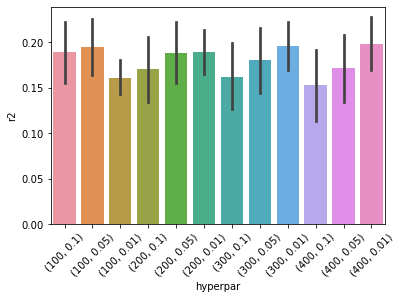

In [39]:
plot = sns.barplot(x="hyperpar", y="r2", data=r2_df, ci=90)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 45)
plt.show()

**Answer 4.4**

In [44]:
# Best hyperparameters found
n_best, lr_best = (400, 0.01)
gb_reg = GradientBoostingRegressor(n_estimators=n_best, learning_rate=lr_best)

# Training the model on the full dataset
gb_reg.fit(X_train, y_train)
y_predicted = gb_reg.predict(X_test)

# Compute R^2 with the best hyperparameters
r2_score(y_test, y_predicted)

0.20497790996605947

**Discuss** : _How do these results compare with the previous setup (the scenario considered in Task 3.4)? Point out two reasons why it is hard to compare the results obtained in 4.3 and 3.4 at face value? How would you fairly compare the two different setups?_

The R-2 score obtained for question 4.4 was of 0.20, while in question 3.4 we had an R-2 score of -0.41906 indicating that it did not properly fit the data, and a lot worse that the model evaluated in 4.3. 
In the first setup (3.4) a hyper-parameter optimization isn't performed, but also features are added to the dataframe in the second setup (4.3), which makes it hard to compare the results at face value since the first model might performs worse than it should. If we would want to fairly compare both setups we should optimize the hyper-parameters in both cases.

## Part 2: Second Album Syndrome

Your second project at *Piccardi Music* is to shed light on one of the business's oldest enigmas: the "second album syndrome." In a nutshell, the "second album syndrome" is a theory that states that the second album of a band always sucks. ([Related read](https://tvtropes.org/pmwiki/pmwiki.php/Main/SophomoreSlump))

Assume—for the purpose of this task—that the Pitchfork data contains all albums for all artists it covers (even though this might not be true in reality).

**Task 5 (Preliminary analyses — 8 pts)**

You begin by carrying out some preliminary data processing and analyses.

1. Create a new dataframe (from the original data with duplicates dropped, the same as you obtained after finishing Task 1.1) containing only albums from artists with two or more albums and where the release year is not empty.
2. Create a new column `album_number` which indicates how many albums the artist has produced before this one (before the second album, the artist has already produced one album).
3. Calculate the mean and the standard error fo the mean of the scores of the first and second albums in the dataset. Additionally, plot the two distributions. 
4. Use an appropriate method to determine if the difference in means of 1st and 2nd albums is statistically significant?
5. **Discuss:** Do these analyses suggest that the "second album syndrome" exists?

---

**Answer 5.1**

In [45]:
snd_album_df_raw = saved_df
# count the occurences of artists
v = df.artist.value_counts()
print(f'There are {len(v.index[v.gt(1)])} artists with two or more abums.')
# keep the albums reviews for artist with more than one album
df_tmp = df[df.artist.isin(v.index[v.gt(1)])]
snd_album_df = df_tmp[df_tmp.releaseyear != 'None']
print(f'This corresponds to {len(df_tmp)} abums.')

There are 3564 artists with two or more abums.
This corresponds to 12410 abums.


**Answer 5.2**

In [46]:
# the total number of album per artist is here
v = df.artist.value_counts()
#we need to sort by artist and then by releaseyear
snd_album_df = snd_album_df.sort_values(by=['artist','releaseyear'])
#for each artist we count the number of previous row in the group
snd_album_df['album_number'] = snd_album_df.groupby('artist').cumcount() 
snd_album_df[['artist','album','releaseyear','album_number']].head() 

,artist,album,releaseyear,album_number
7411,!!!,Split EP,1999.0,0
6891,!!!,Louden Up Now,2004.0,1
10517,!!!,Myth Takes,2007.0,2
10053,!!!,"Strange Weather, Isn't It?",2010.0,3
2397,!!!,Thr!!!er,2013.0,4


**Answer 5.3** Calculate the mean and the standard error fo the mean of the scores of the first and second albums in the dataset. Additionally, plot the two distributions.

In [47]:
#select first albums and second albums separately 
first_albums = snd_album_df[snd_album_df['album_number']==0]
snd_albums = snd_album_df[snd_album_df['album_number']==1]

fst_mean,fst_std = first_albums['score'].describe()[['mean','std']]
snd_mean,snd_std = snd_albums['score'].describe()[['mean','std']]
print('The first album score has an average of {:2.3} with a standard deviation of {:2.3}.'.format(fst_mean,fst_std))
print('The second album score has an average of {:2.3} with a standard deviation of {:2.3}.'.format(snd_mean,snd_std))

The first album score has an average of 7.3 with a standard deviation of 1.24.
The second album score has an average of 7.04 with a standard deviation of 1.27.


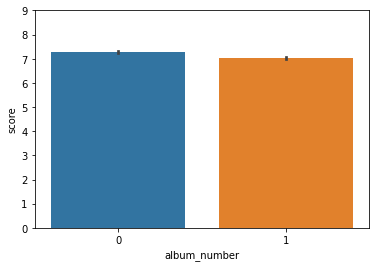

In [48]:
# Displaying the first and second albums average scores along with their respective CI (95%)
sns.barplot(x="album_number", y="score", data=snd_album_df[snd_album_df["album_number"].isin({0, 1})], ci=95)
plt.ylim([0, 9])
plt.show()

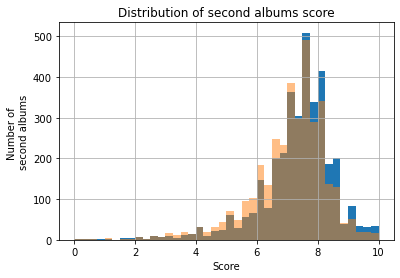

In [49]:
first_albums['score'].hist(bins=40,)
plt.xlabel('Score')
plt.ylabel('Number of \nfirst albums')
plt.title('Distribution of first albums score');

snd_albums['score'].hist(bins=40,alpha =0.5)
plt.xlabel('Score')
plt.ylabel('Number of \nsecond albums')
plt.title('Distribution of second albums score');

fig.subplots_adjust(hspace=1)

**Answer 5.4** Use an appropriate method to determine if the difference in means of 1st and 2nd albums is statistically significant?

In [50]:
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
#We are using a t-test for related sample because we have the same set of artists with different albums
#null hypothesis that the means do no differ 
# the p-value will test us if we can or not reject the null hypothesis
stat,pvalue = ttest_rel(first_albums['score'], snd_albums['score'])

In [51]:
print('The p-value is {} thus we can reject the null hyptothesis and the difference is significant.'.format(pvalue)) 

The p-value is 6.279450038726332e-28 thus we can reject the null hyptothesis and the difference is significant.


**Answer 5.5 : Discuss** _Do these analyses suggest that the "second album syndrome" exists?_


According to the statistics the difference in means of 1st and 2nd albums is statistically significant, however it is small which makes the syndrome not so pronounced.

**Task 6 (Regression analysis — 20 pts)**

Next, you proceed to examine some hypotheses about the "second album syndrome" using a regression framework. Namely:

- The **time spent hypothesis:**  the first album usually has a couple of years of development under its belt and plenty of trial and error from live concerts to help the band determine what does or doesn't work. The second album, on the other hand, is often made in a rush.

- The **style change hypothesis:** bands often try to change their style after their first album. This change is not always welcomed by the listeners.

1. Create a new dataframe containing one row per 1st-2nd album pair. The dataframe should contain rows:
    - `score_diff`: the difference in scores between the second and the first album (second - first).
    - `time_diff`: the number of days elapsed between the first and the second album.
    - `did_style_change`: a dummy variable that indicates whether the style of the music has changed. To obtain it, first, calculate the [standardized euclidean distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.seuclidean.html) of music-related numerical features¹ between the second and the first album. Second, assign 1 to the 20% most distant 1st-2nd album pairs and 0 to all others.
2. Fit a linear regression using `statsmodels` with this dataframe. Your regression should consider only an intercept, i.e., `"score_diff ~ 1"`.
3. **Discuss:** Interpret the $R^2$ in your regression here. Does this analysis confirm what you observed in Task 5? Why?
4. Include the `time_diff` and `did_style_change` as covariates in your model. Fit the regression again and report the summary of your model. 
5. **Discuss:** Interpret the coefficients `time_diff` and `did_style_change`. Carefully explain whether they provide evidence towards each of the aforementioned hypotheses? Do they rule out other reasons that may cause the "second album syndrome effect"?
6. Create a new column called `time_diff_standardized`. It should be a standardized version of the `time_diff` column. Repeat the regression done in 6.4 using the `time_diff_standardized` column instead of the `time_diff` column.
7. **Discuss:** Explain how the interpretation of the coefficients associated with this new column `time_diff_standardized` differ from its non-standardized version 
`time_diff`?

--- 

**¹** Music related numerical features are:  "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", and "tempo".


**Answer 6.1**

In [52]:
# Dataframe with the first and the second albums for each artist
first_second_albums = pd.merge(first_albums, snd_albums, left_on="artist", right_on="artist", suffixes=("_first", "_second"))
# adding features score_diff, time_diff
first_second_albums["score_diff"] = first_second_albums["score_second"] - first_second_albums["score_first"]
first_second_albums["time_diff"] = (first_second_albums["releaseyear_second"] - first_second_albums["releaseyear_first"]) * 365
# adding feature did_style_change
from scipy.spatial.distance import seuclidean
numerical_features=["key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo"]
numerical_first = [x + "_first" for x in numerical_features]
numerical_second = [x + "_second" for x in numerical_features]
diff_style = first_second_albums.apply(lambda x: seuclidean(x[numerical_first], x[numerical_second], np.ones(len(numerical_features))), axis=1)
q80 = diff_style.quantile(0.8)
first_second_albums["did_style_change"] = (diff_style >= q80).astype(int)
first_second_albums.sample(5)

,artist,album_first,reviewauthor_first,score_first,releaseyear_first,reviewdate_first,recordlabel_first,danceability_first,energy_first,key_first,...,Jazz_onehot_second,Metal_onehot_second,Other_onehot_second,Pop/R&B_onehot_second,Rap_onehot_second,Rock_onehot_second,album_number_second,score_diff,time_diff,did_style_change
3158,The Thing,The Cherry Thing,Lindsay Zoladz,8.0,2012.0,June 20 2012,Smalltown Supersound,0.344750,0.540000,5.750000,...,1,0,0,0,0,0,1,-0.3,365.0,0
3236,Tinashe,Aquarius,Meaghan Garvey,7.5,2014.0,October 9 2014,RCA,0.471111,0.470109,6.111111,...,0,0,0,1,0,0,1,-0.4,365.0,0
1538,King Kong,The Big Bang,Jason Nickey,6.2,2002.0,September 23 2002,Drag City,0.659333,0.749267,4.466667,...,0,0,0,0,0,0,1,-1.4,1825.0,0
275,Big Boi,Sir Lucious Left Foot: The Son of Chico Dusty,Tom Breihan,9.2,2010.0,July 6 2010,Def Jam,0.683400,0.740200,5.333333,...,0,0,0,0,1,0,1,-3.1,730.0,0
2522,Sean Nicholas Savage,Other Life,Jamieson Cox,7.4,2013.0,May 31 2013,Arbutus,0.410000,0.660091,4.727273,...,0,0,0,0,0,1,1,-0.4,365.0,0


**Answer 6.2**

In [53]:
# Fitting a linear model with score-diff~1
mod = smf.ols(formula='score_diff ~ 1', data=first_second_albums)
np.random.seed(2)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 26 Nov 2021   Prob (F-statistic):                nan
Time:                        23:40:28   Log-Likelihood:                -6207.4
No. Observations:                3564   AIC:                         1.242e+04
Df Residuals:                    3563   BIC:                         1.242e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2556      0.023    -11.049      0.0

**Answer 6.3 : Discuss** _Discuss: Interpret the  𝑅2  in your regression here. Does this analysis confirm what you observed in Task 5? Why?_

According to Task 5, we noticed that the average score for the first and the second albums were significantly different. That is why a constant model is not well suited for our data. This also explains why we found a small value of R^2 (R^2 << 0), so this indeed confirms what we observed in task 5.

**Answer 6.4** _Create a new column called time_diff_standardized. It should be a standardized version of the time_diff column. Repeat the regression done in 6.4 using the time_diff_standardized column instead of the time_diff column._

In [54]:
# Fitting a linear model with time_change and did_style_change as covariates
mod = smf.ols(formula='score_diff ~ time_diff + C(did_style_change)', data=first_second_albums)
np.random.seed(2)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     33.57
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           3.60e-15
Time:                        23:40:28   Log-Likelihood:                -6174.1
No. Observations:                3564   AIC:                         1.235e+04
Df Residuals:                    3561   BIC:                         1.237e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

**Answer 6.5 : Discuss** Interpret the coefficients time_diff and did_style_change. Carefully explain whether they provide evidence towards each of the aforementioned hypotheses? Do they rule out other reasons that may cause the "second album syndrome effect"?

Changing the style of music between the first and the second album doesn't have a significant positive or negative impact on the score of the second album (p-value of the categorical covariate did_style_change >> 0.05).
Therefore, we cannot reject the hypothesis that listeners don't appreciate a second album with different music styles as much as the first album.
On the other hand, the time spent on the second album (time_diff) seems to have a significant role on its quality (p-value of time_diff << 0.05).
However, the estimated coefficient for time_diff is quite small compared to the estimated intercept (-9.178e-05 << -0.1443 = intercept).
The reason for that is that we first need to standardize time_diff in order to have a proper interpretation of the magnitude of its coefficient in the linear regression.
This is what we do in question 6.6.

Given that this model only explains about 2% of the variability of the difference of scores between the first and the second albums (R^2 = 2%), we cannot rule out other reasons that may cause the "second album syndrome effect".  Maybe there exists other features that can be used to show if the "second album syndrome effect" exists.

**Answer 6.6**

In [55]:
# Standardized time_diff
first_second_albums["time_diff_standardized"] = (first_second_albums["time_diff"] - first_second_albums["time_diff"].mean()) / first_second_albums["time_diff"].std()
# Fitting a linear model using instead a standardized time_diff
mod = smf.ols(formula='score_diff ~ time_diff_standardized + C(did_style_change)', data=first_second_albums)
np.random.seed(2)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     33.57
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           3.60e-15
Time:                        23:40:28   Log-Likelihood:                -6174.1
No. Observations:                3564   AIC:                         1.235e+04
Df Residuals:                    3561   BIC:                         1.237e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

**Answer 6.7 : Discuss**

We remark that the estimated coefficient and the p-value for the covariate did_style_change is the same as in question 6.4.
This confirms the lack of information to give credit to the style change hypothesis.

On the other hand, by standardizing the time spent to work on the second album, we found that the time spent on the second album still has a significant role (p-value << 0.5).
In addition, this time, the estimated coefficient for time_diff_standardized is much bigger, giving credit to the time spent hypothesis.

**Task 7 (Sanity checks — 6 pts)**

You decide to perform a few last sanity checks for your analysis.

1.  **Discuss:** If the Second Album Syndrome existed, i.e., something was special about the second album (as in if it was bad for a very particular reason that afflicted album number 2 more than all others), what would you expect to happen to the mean score of the third album?
2. Using the dataset you created in Task 5, calculate the mean and the standard error of the mean for the 1st, 2nd, 3rd, and 4th albums. Test whether the difference between the average score of the second and the third album is statistically significant.
3. **Discuss:** Does this suggest that the Second Album Syndrome exists?

---


**Answer 7.1 : Discuss**

We would expect that for example the mean value of the score for the second album would be different (statistically different) from the mean value of the score of the other albums. Therefore we would expect the mean of the third album to be greater than the one of the second album.

**Answer 7.2**

In [56]:
# First we group the dataframe from task 5 by album number (1st, 2nd, 3rd, and 4th albums),
# while taking only the score column
grouped_album = snd_album_df.groupby(snd_album_df.album_number)['score']
# then we take the mean and standard deviation of each of album number 
# ( of all of the 1st albums for row 1 (album_number = 0))
grouped_album_mean = grouped_album.describe()[['mean','std']]
print(grouped_album_mean.iloc[0:4])

# Finally we calculate the mean and standard deviation of the mean score value of the 1st to 4th ablums
mean = grouped_album_mean['mean'].iloc[0:4].mean()
std = grouped_album_mean['mean'].iloc[0:4].std()

print('mean of the mean score of the 1st to 4th album : ',mean)
print('correspoonding standard deviation: ',std)

                  mean       std
album_number                    
0             7.298906  1.237607
1             7.043294  1.271300
2             7.044821  1.221931
3             7.041766  1.224504
mean of the mean score of the 1st to 4th album :  7.107196498234405
correspoonding standard deviation:  0.12781223494372473


To test whether the difference between the average score of the second and the third album is statistically significant, we perform a t-test, assuming the data has a normal distribution.

In [57]:
import scipy.stats as stats

In [58]:
grouped_album_mean.head()

,mean,std
album_number,,
0,7.298906,1.237607
1,7.043294,1.271300
2,7.044821,1.221931
3,7.041766,1.224504
4,6.912656,1.272001


In [59]:
stats.ttest_ind(grouped_album.get_group(1),grouped_album.get_group(2))

Ttest_indResult(statistic=-0.04321339147644, pvalue=0.965532995457915)

**Answer 7.3 : Discuss** _Does this suggest that the Second Album Syndrome exists?_

The p-value is 0.96 thus we cannot reject the null hypothesis and the difference is not significant. The null hypothesis being that the mean values of the second album is the same as the mean value of the third album. This therefore suggests that the second album syndrome doesn't exist.

**Task 8 (Eureka — 14 pts)**

Your boss, *Signor Piccardi*, proposes that you carry out a simulation to make things clearer. Assuming that:


- Each band $i$ has a "talent" $\mu_i$ , which is uniformally distributed between 2 and 8, i.e., $\mu_i \sim U_{[2,8]}$.
- When a band $i$ produces an album $j$, it has quality $s_j$. This score is normally distributed with mean $\mu_i$ and standard deviation $1$, i.e., $s_j \sim N(\mu_i, 1)$
- Talents are independent and identically distributed random variables.
 
Carry out the following simulation:

- Create 1000 hypothetical bands with intrinsic talents $\mu_i \sim U_{[2,8]}$ for $i \in [1,1000]$.
- Have each hypothetical band create a hypothetical album.
- Discard all bands whose albums received a score smaller than 6.
- For each of the remaining bands, create two additional albums.

Analyzing the scores obtained in this simulation, provide a coherent explanation for the  scores obtained in Task 7.2. 

--- 

**Hint:** You can use numpy to sample random variables (e.g. [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html))

In [60]:
for i in range(10):
    print( ' _____ Run number ', i+1 , '_____')
    talent = np.random.uniform(2, 8, (1000, 1))
    score1 = np.random.normal(talent, 1)
    ind = talent >= 6
    talent = talent[ind]
    score1 = score1[ind]
    score2 = np.random.normal(talent, 1)
    score3 = np.random.normal(talent, 1)

    df_sim = pd.DataFrame(np.array([talent, score1, score2, score3]).T, columns = ['Talent','ScoreAlbum1','ScoreAlbum2','ScoreAlbum3'])
    df_sim.describe()
    print('T test comparing the average score of the 2nd and 3rd ablum: pvalue = {:.2f} , statistic {:.2f} '.format(stats.ttest_ind(score3,score2)[1],stats.ttest_ind(score3,score2)[0]))

 _____ Run number  1 _____
T test comparing the average score of the 2nd and 3rd ablum: pvalue = 0.24 , statistic -1.19 
 _____ Run number  2 _____
T test comparing the average score of the 2nd and 3rd ablum: pvalue = 0.39 , statistic -0.86 
 _____ Run number  3 _____
T test comparing the average score of the 2nd and 3rd ablum: pvalue = 0.93 , statistic -0.09 
 _____ Run number  4 _____
T test comparing the average score of the 2nd and 3rd ablum: pvalue = 0.45 , statistic -0.75 
 _____ Run number  5 _____
T test comparing the average score of the 2nd and 3rd ablum: pvalue = 0.21 , statistic 1.26 
 _____ Run number  6 _____
T test comparing the average score of the 2nd and 3rd ablum: pvalue = 0.87 , statistic 0.16 
 _____ Run number  7 _____
T test comparing the average score of the 2nd and 3rd ablum: pvalue = 0.78 , statistic -0.28 
 _____ Run number  8 _____
T test comparing the average score of the 2nd and 3rd ablum: pvalue = 0.32 , statistic -1.00 
 _____ Run number  9 _____
T test 

The results of the simulation change from one run to another, but generally, we get a high pvalue when the null hypothesis is " the mean value of the score for the 3rd and 2nd album is the same". This indicates that we can't reject the null hypothesis. Thus we can only suggest that it doesn't exist, given that these results align with the results observed in Task 7 (and rejecting the null hypothesis doesn't approve the alternative hypothesis).